<a href="https://colab.research.google.com/github/FerdousiHaque/google-git/blob/master/Bert_Offensiveness_Detection5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 7.6 MB/s 
     |████████████████████████████████| 588.3 MB 6.1 kB/s 
     |████████████████████████████████| 1.7 MB 49.4 MB/s 
     |████████████████████████████████| 439 kB 68.5 MB/s 
     |████████████████████████████████| 6.0 MB 39.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.

In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text

preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
endoded_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"


In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import io

url = 'https://raw.githubusercontent.com/FerdousiHaque/Database-Project/master/off_labeled1_2data.csv'

df = pd.read_csv(url)
df.head(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,1,1,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,1,3,1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,1,3,1,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,1,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,1,6,1,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
df['class'].value_counts()

1    20620
2     4163
Name: class, dtype: int64

In [ ]:
df.groupby('class').describe()

Unnamed: 0                                                             \
           count          mean          std  min     25%      50%       75%   
class                                                                         
1        20620.0  12699.490786  7315.105532  1.0  6412.5  12701.5  19009.25   
2         4163.0  12590.555369  7222.217918  0.0  6204.5  12759.0  18957.00   

                  count            ... offensive_language       neither  \
           max    count      mean  ...                75%  max    count   
class                              ...                                    
1      25295.0  20620.0  3.257759  ...                3.0  9.0  20620.0   
2      25296.0   4163.0  3.172712  ...                1.0  4.0   4163.0   

                                                    
           mean       std  min  25%  50%  75%  max  
class                                               
1      1.001843  0.048214  1.0  1.0  1.0  1.0  4.0  
2      2.845544  0.795181  2.0  2.0  3.0  3.0  9.0  

[2 rows x 40 columns]

In [ ]:
df_spam = df[df['class']== 2]
df_spam.shape

df_ham = df[df['class']== 1]
df_ham.shape

df_ham_down = df_ham.sample(df_spam.shape[0])
df_ham_down.shape

df_balanced = pd.concat([df_spam, df_ham_down])
df_balanced.shape

df_balanced['class'].value_counts()

2    4163
1    4163
Name: class, dtype: int64

In [ ]:
df_balanced['language'] = df_balanced['class'].apply(lambda x:0 if x == 2 else 1) 

df_balanced.sample(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,language
14210,14551,3,1,3,1,1,RT @AnunnakiGod: bitch what ocean is this?? ht...,1
12490,12802,3,1,1,3,2,Lmao RT @iPOSTBADTWEETS: Lowkey Peyton Manning...,0
21522,21984,3,1,1,3,2,The bird is the word. #EsuranceSave30,0
23340,23826,3,1,1,2,2,"You know I'm not big on the NFL, but I'm so si...",0
22692,23170,3,1,1,2,2,When did Miley turn ghetto?,0
24081,24582,3,1,3,1,1,imma tall dread head wit a fat face\n\nbitch d...,1
9529,9789,3,1,3,1,1,Got all the black bitches mad cuz my main bitc...,1
11416,11709,3,1,3,1,1,"I'm the real Tony Montana, I got 50 naked bitc...",1
16406,16779,3,1,1,3,2,RT @Maxicat: Charlie Rangel Re-Writes History:...,0
16337,16710,3,1,1,3,2,"RT @MLBStatoftheDay: Since 1914, Derek Jeter&#...",0


In [ ]:
df_balanced['language'].value_counts()

0    4163
1    4163
Name: language, dtype: int64

In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics.pairwise import cosine_similarity

X_train, X_test, y_train, y_test = train_test_split(df_balanced['tweet'], df_balanced['language'], stratify=df_balanced['language'])
X_train.head(5)

22146    This stank bitch steady calling.. I wonder how...
16150    RT @Lauren_Fawx: &#8220;@ItsNotAdam: @ItsNotAd...
10873                     I see ya big Boi in the Oreo V's
14348    RT @BenTateRB: This is crazy no RB picked yet....
21143                           Stay pooned, #bitches.....
Name: tweet, dtype: object

In [ ]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
endoded_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

bert_preprocess = hub.KerasLayer(preprocess_url)
bert_encoder = hub.KerasLayer(endoded_url)

In [ ]:
def get_sentence_embeding(sen):
  preprocess_text = bert_preprocess(sen)
  return bert_encoder(preprocess_text)['pooled_output']



In [ ]:
# bert layers
text_input = tf.keras.layers.Input(shape=(), dtype = tf.string, name ="text")
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)


# neural network layer
l = tf.keras.layers.Dropout(0.1, name='dropout')(outputs['pooled_output'])

l = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(l)

# final model
model = tf.keras.Model(inputs=[text_input], outputs=[l])


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [ ]:
METRICS = [tf.keras.metrics.BinaryAccuracy(name='accuracy'),tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name='recall'),
           ]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
196/196 [==============================] - 2577s 13s/step - loss: 0.6340 - accuracy: 0.6419 - precision: 0.6463 - recall: 0.6268
Epoch 2/5
196/196 [==============================] - 2534s 13s/step - loss: 0.5828 - accuracy: 0.7016 - precision: 0.6957 - recall: 0.7168
Epoch 3/5
196/196 [==============================] - 2535s 13s/step - loss: 0.5470 - accuracy: 0.7314 - precision: 0.7283 - recall: 0.7383
Epoch 4/5
196/196 [==============================] - 2524s 13s/step - loss: 0.5289 - accuracy: 0.7415 - precision: 0.7365 - recall: 0.7521
Epoch 5/5
196/196 [==============================] - 2531s 13s/step - loss: 0.5158 - accuracy: 0.7478 - precision: 0.7450 - recall: 0.7534


In [ ]:
model.evaluate(X_test, y_test)

66/66 [==============================] - 847s 13s/step - loss: 0.4981 - accuracy: 0.7618 - precision: 0.7134 - recall: 0.8751


[0.49814268946647644,
 0.7617675065994263,
 0.7133907675743103,
 0.8751201033592224]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

66/66 [==============================] - 846s 13s/step


Text(33.0, 0.5, 'Truth')

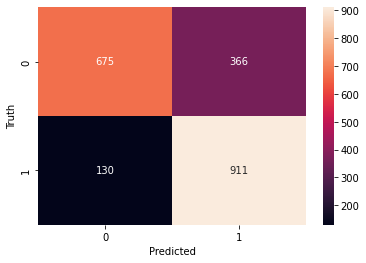

In [ ]:
import seaborn as sn
from matplotlib import pyplot as plt

sn.heatmap(confusion_matrix(y_test, (y_predicted > 0.5)), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, (y_predicted > 0.5)))

              precision    recall  f1-score   support

           0       0.84      0.65      0.73      1041
           1       0.71      0.88      0.79      1041

    accuracy                           0.76      2082
   macro avg       0.78      0.76      0.76      2082
weighted avg       0.78      0.76      0.76      2082



In [ ]:
reviews=['youu got wild bitches telling you lies']
model.predict(reviews)

1/1 [==============================] - 2s 2s/step


array([[0.89619005]], dtype=float32)